### Szeregi czasowe

Szereg czasowy jest zbiorem indeksowanych danych punktowych, uporządkowanym w sekwencji czasu. Najczęściej szereg czasowy jest sekwencją punktow w czasie rozdzielonych identycznymi odstępami czasu, taki szereg nosi nazwę discrete-time data.

In [1]:
import numpy as np
import pandas as pd

In [2]:
# importowanie

result=pd.read_csv('Power-Networks-LCL-June2015(withAcornGps)v2_1.csv',header=0)
result.head()

,LCLid,stdorToU,DateTime,KWH/hh (per half hour),Acorn,Acorn_grouped
0,MAC000002,Std,2012-10-12 00:30:00.0000000,0,ACORN-A,Affluent
1,MAC000002,Std,2012-10-12 01:00:00.0000000,0,ACORN-A,Affluent
2,MAC000002,Std,2012-10-12 01:30:00.0000000,0,ACORN-A,Affluent
3,MAC000002,Std,2012-10-12 02:00:00.0000000,0,ACORN-A,Affluent
4,MAC000002,Std,2012-10-12 02:30:00.0000000,0,ACORN-A,Affluent


In [3]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 6 columns):
LCLid                      1000000 non-null object
stdorToU                   1000000 non-null object
DateTime                   1000000 non-null object
KWH/hh (per half hour)     1000000 non-null object
Acorn                      1000000 non-null object
Acorn_grouped              1000000 non-null object
dtypes: object(6)
memory usage: 45.8+ MB


In [4]:
result['date']=pd.to_datetime(result['DateTime'])     # konwesja do datetime object
data=result.loc[:,['KWH/hh (per half hour) ']]
data=data.set_index(result.date)
data['KWH/hh (per half hour) ']=pd.to_numeric(data['KWH/hh (per half hour) '],downcast='float',errors='coerce')

In [5]:
data.head()

,KWH/hh (per half hour)
date,
2012-10-12 00:30:00,0.0
2012-10-12 01:00:00,0.0
2012-10-12 01:30:00,0.0
2012-10-12 02:00:00,0.0
2012-10-12 02:30:00,0.0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1000000 entries, 2012-10-12 00:30:00 to 2012-11-08 10:00:00
Data columns (total 1 columns):
KWH/hh (per half hour)     999971 non-null float32
dtypes: float32(1)
memory usage: 11.4 MB


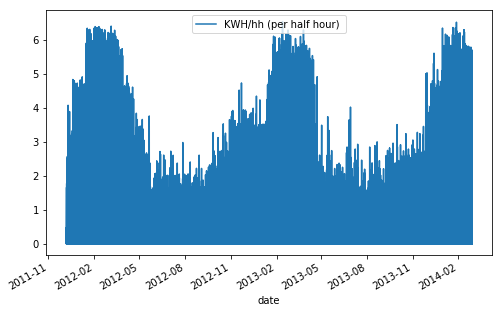

In [8]:
data.plot(figsize=(8,5));

### Resampling

Zmiana częstości obserwacji w szeregu czasowym.

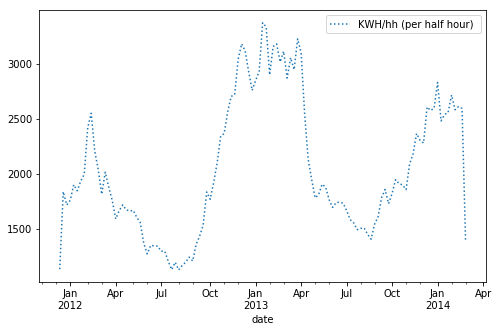

In [9]:
# Grupowanie po tygodniu

weekly=data.resample('W').sum()
weekly.plot(figsize=(8,5),style=[':']);

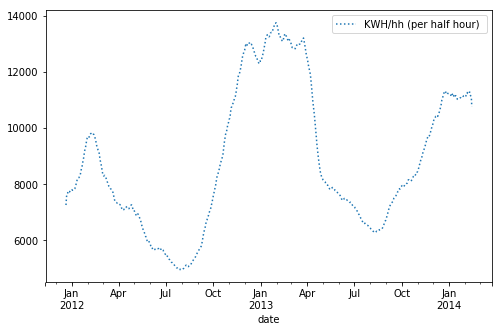

In [10]:
# Grupowanie po dniach z rolowaniem

daily=data.resample('D').sum()
daily.rolling(30,center=True).sum().plot(figsize=(8,5),style=[':']);

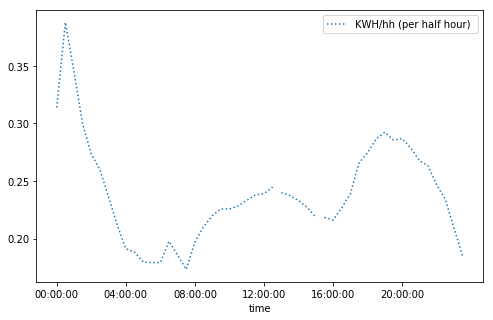

In [11]:
# Grupowanie po godzinach dnia

by_time=data.groupby(data.index.time).mean()
houerly_ticks=4*60*60*np.arange(6)
by_time.plot(xticks=houerly_ticks, figsize=(8,5),style=[':']);

W Pandas istnieje wiele opcji do określenia okresu czasu (przykłady):

| Alias | Opis  |
| :---: | :---: |
| B | Business day |
| D | Calendar day |
| W | Weekly |
| M | Month end |
| Q | Quarter end |
| A | Business day |
| BA | Calendar day |
| AS | Weekly |
| H | Hourly |
| T, min |Minutely  |

Oraz do agregacji (przykłady):

| Alias | Opis  |
| :---: | :---: |
| first | First valid data value |
| last | Last valid data value |
| max | Maximum data value |
| mean | Mean of values in time range |
| median | Median of values intime range |
| min | Minimum data value |
| nunique | Number of unique values |
| std | Standard deviation of values |
| sum | Sum of values |
| var | Variance of values  |



### Podstawowe sposoby eksploracyjnej analizy

In [12]:
df=result.loc[:,['date','KWH/hh (per half hour) ']]
df['KWH/hh (per half hour) ']=pd.to_numeric(df['KWH/hh (per half hour) '],downcast='float',errors='coerce')
df=df.groupby(['date']).sum().reset_index()
df.head()

,date,KWH/hh (per half hour)
0,2011-12-06 13:00:00,0.105
1,2011-12-06 13:30:00,0.134
2,2011-12-06 14:00:00,0.141
3,2011-12-06 14:30:00,0.130
4,2011-12-06 15:00:00,0.149


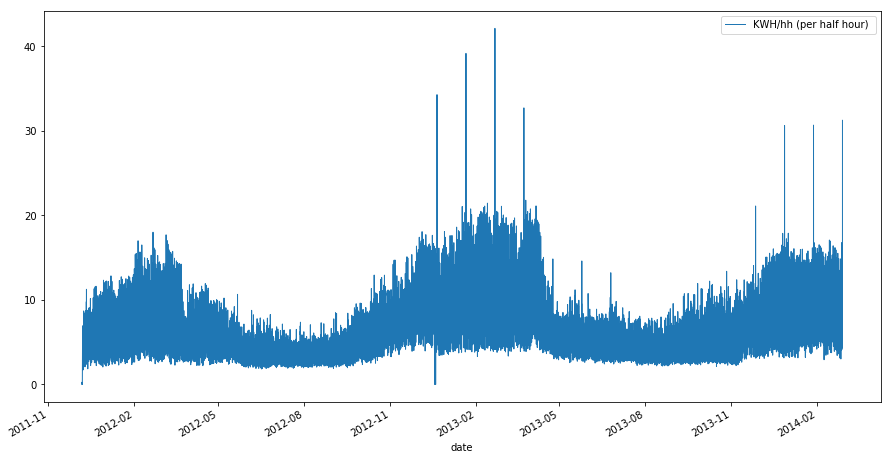

In [13]:
# zmiany w czasie
df.plot.line(x='date',y='KWH/hh (per half hour) ', figsize=(15,8),linewidth=1, fontsize=10);

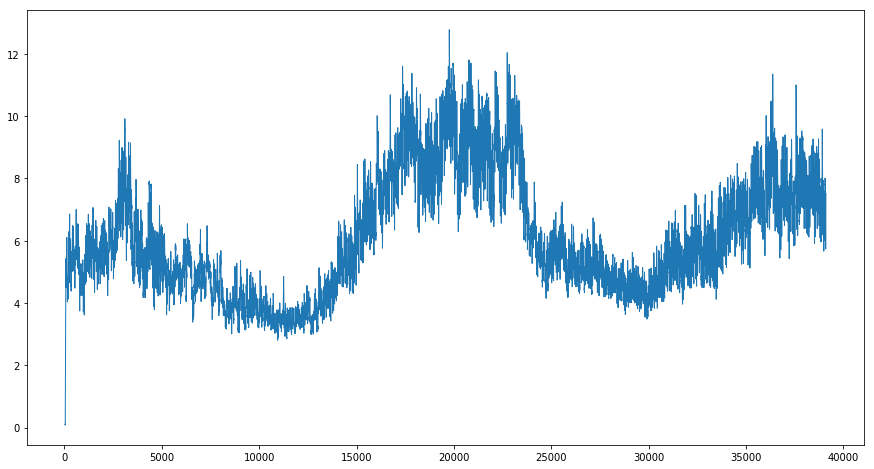

In [14]:
# analiza trendu

df['KWH/hh (per half hour) '].rolling(30).mean().plot(figsize=(15,8),linewidth=1, fontsize=10);

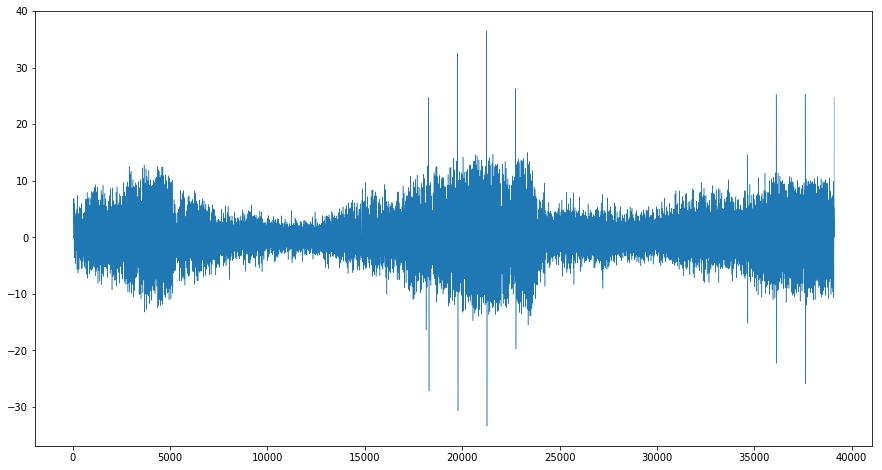

In [15]:
# analiza zmienności sezonowej

df['KWH/hh (per half hour) '].diff(periods=30).plot(figsize=(15,8),linewidth=0.5, fontsize=10);

In [16]:
# scatterplot miesięczny

mon=df['date']
temp=pd.DatetimeIndex(mon)
month=pd.Series(temp.month)
to_be_plotted=df.drop(['date'],axis=1)
to_be_plotted=to_be_plotted.join(month)

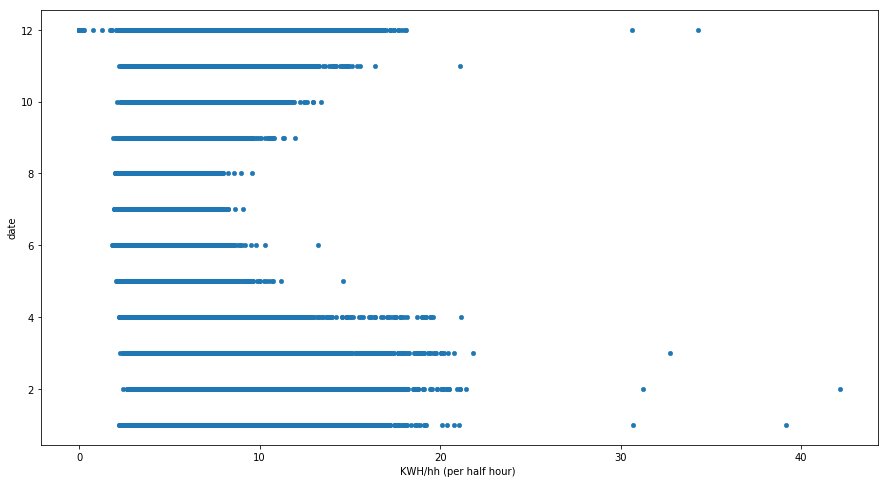

In [55]:
to_be_plotted.plot.scatter(x='KWH/hh (per half hour) ',y='date',figsize=(15,8),linewidth=0.5, fontsize=10);

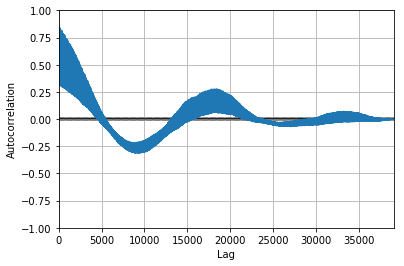

In [17]:
# funkcja autokorelacji

pd.plotting.autocorrelation_plot(df['KWH/hh (per half hour) ']);